In [13]:
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
data = pd.read_csv('C:\\Users\\Dell\\Downloads\\archive (11)\\Finance_data.csv')
print(data)


    gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0   Female   34                Yes             1              2           5   
1   Female   23                Yes             4              3           2   
2     Male   30                Yes             3              6           4   
3     Male   22                Yes             2              1           3   
4   Female   24                 No             2              1           3   
5   Female   24                 No             7              5           4   
6   Female   27                Yes             3              6           4   
7     Male   21                Yes             2              3           7   
8     Male   35                Yes             2              4           7   
9     Male   31                Yes             1              3           7   
10  Female   35                Yes             2              4           7   
11    Male   29                Yes             2    

In [6]:
X = data[['Mutual_Funds', 'age']]
y = data['Equity_Market']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
svm_model = SVC(kernel='linear')

In [8]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
y_pred = svm_model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 50.00%


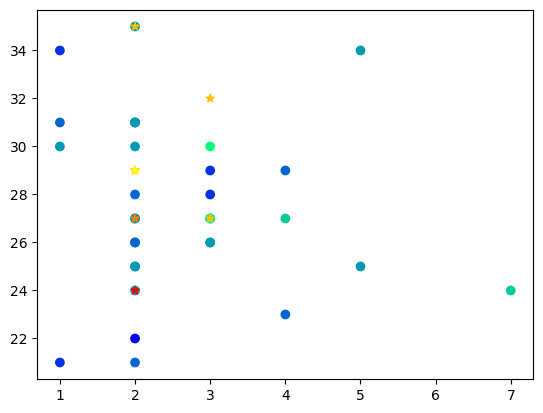

In [11]:
plt.scatter(X_train['Mutual_Funds'], X_train['age'], c=y_train, cmap='winter', label='Training Data')
plt.scatter(X_test['Mutual_Funds'], X_test['age'], c=y_test, cmap='autumn', marker='*', label='Test Data')

In [14]:
h = .02 
x_min, x_max = X['Mutual_Funds'].min() - 1, X['Mutual_Funds'].max() + 1
y_min, y_max = X['age'].min() - 1, X['age'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

C:\Users\Dell\anaconda4\envs\Random\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


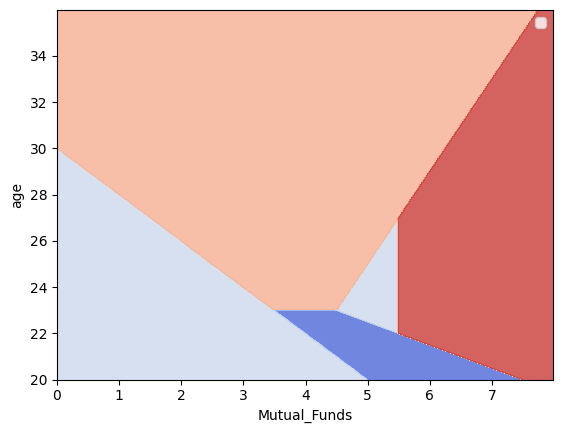

In [15]:
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)

plt.xlabel('Mutual_Funds')
plt.ylabel('age')
plt.legend()
plt.show()